In [16]:
 pip list

Package           Version
----------------- -----------
asttokens         2.4.1
colorama          0.4.6
comm              0.2.2
contourpy         1.2.1
cycler            0.12.1
debugpy           1.8.1
decorator         5.1.1
executing         2.0.1
fonttools         4.51.0
ipykernel         6.29.4
ipython           8.24.0
jedi              0.19.1
joblib            1.4.2
jupyter_client    8.6.1
jupyter_core      5.7.2
kiwisolver        1.4.5
matplotlib        3.8.4
matplotlib-inline 0.1.7
nest-asyncio      1.6.0
numpy             1.26.4
packaging         24.0
pandas            2.2.2
parso             0.8.4
pillow            10.3.0
pip               24.0
platformdirs      4.2.2
prompt-toolkit    3.0.43
psutil            5.9.8
pure-eval         0.2.2
Pygments          2.18.0
pyparsing         3.1.2
python-dateutil   2.9.0.post0
pytz              2024.1
pywin32           306
pyzmq             26.0.3
scikit-learn      1.4.2
scipy             1.13.0
seaborn           0.13.2
six              

Importing Dependencies

In [12]:
# Install a pip package in the current Jupyter kernel
pip install matplotlib
pip install seaborn
pip install scikit-learn
pip install xgboost




SyntaxError: invalid syntax (539066177.py, line 2)

In [5]:
import sys
!{sys.executable} -m pip list

'e:\Sales' is not recognized as an internal or external command,
operable program or batch file.


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm

from xgboost import XGBRegressor
from sklearn import metrics


Data Collection and Preprocessing

In [18]:
# loading the data from csv file to Pandas DataFrame
try:
    df1 = pd.read_csv('Data/Lead.csv', encoding='latin1')  
    # print(df1.to_string())
except UnicodeDecodeError as e:
    print("UnicodeDecodeError:", e)
    
try:
    df2 = pd.read_csv('Data/Sales.csv', encoding='latin1') 
    # print(df2.to_string())
except UnicodeDecodeError as e:
    print("UnicodeDecodeError:", e)  
    
# Merge the DataFrames based on 'LeadId'
merged_df = pd.merge(df1, df2, on='Lead ID', how='inner')  
    
print(merged_df.info)

C:\Users\Ayush Singh\AppData\Local\Temp\ipykernel_15416\769537119.py:3: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('Data/Lead.csv', encoding='latin1')


<bound method DataFrame.info of              Branch_x Lead Source Type: Picklist Value_x  \
0      WEST-AHMEDABAD                                RLD   
1         WEST-INDORE                                PLD   
2       EAST-GUWAHATI                                PLD   
3     SOUTH-HYDERABAD                                PLD   
4      NORTH-LUDHIANA                                PLD   
...               ...                                ...   
1944   WEST-AHMEDABAD                                RLD   
1945   WEST-AHMEDABAD                                RLD   
1946   WEST-AHMEDABAD                                RLD   
1947   WEST-AHMEDABAD                                RLD   
1948   WEST-AHMEDABAD                                RLD   

     Source of Lead: Picklist Value_x     Lead ID            Site Name_x  \
0                              Dealer  LID-557488      Kamlesh bhai shah   
1                            Scouting  LID-555789              Tiwari ji   
2                  

In [19]:
# Export the merged DataFrame to a new CSV file
merged_df.to_csv('Data/LeadToSales.csv', index=False)

In [20]:
final_data = pd.read_csv('Data/LeadToSales.csv')

In [21]:
final_data.head()

,Branch_x,Lead Source Type: Picklist Value_x,Source of Lead: Picklist Value_x,Lead ID,Site Name_x,House No./ Flat No.,Site FIR: Picklist Value,Drop Reason: Picklist Value,Person meet: Picklist Value,Lead Created Date_x,...,Last supply,On going supply,Branch Code,Branch_y,EMD at Lead Creation_y,Expected Maturity Date_y,Site Address as per GPS,Owner Name_y,Owner Number_y,Sale Remarks
0,WEST-AHMEDABAD,RLD,Dealer,LID-557488,Kamlesh bhai shah,B 49,Lead,NaN,Site Worker,09-08-2023,...,0,0,NaN,WEST-AHMEDABAD,13-09-2023,NaN,Sitabugh soc.,Kamlesh bhai shah,NaN,Supply Prior To 28 Days
1,WEST-INDORE,PLD,Scouting,LID-555789,Tiwari ji,NaN,Lead,NaN,Owner,05-08-2023,...,0,0,5118,WEST-INDORE,30-09-2023,NaN,"Sohaval Satna, Madhya Pradesh, India",Tiwari ji,NaN,Supply Prior To 28 Days
2,EAST-GUWAHATI,PLD,Scouting,LID-545639,Rakhal Debnatj,NaN,Lead,NaN,Owner,11-07-2023,...,1,0,5105,EAST-GUWAHATI,15-08-2023,NaN,"R7FJ+M9P, Dhaleswar, Agartala, Tripura 799001,...",Rakhal Debnath,NaN,Supply Prior To 28 Days
3,SOUTH-HYDERABAD,PLD,Scouting,LID-542246,Gurubrahma charay,NaN,Lead,NaN,Owner,01-07-2023,...,0,0,5123,SOUTH-HYDERABAD,05-07-2023,NaN,"7554+933, Bank Colony, VDO's Colony, Khammam, ...",Gurubrahma charay,NaN,Supply Prior To 28 Days
4,NORTH-LUDHIANA,PLD,Scouting,LID-555833,Jiwan Ji Sra Hospital,NaN,Lead,NaN,Owner,05-08-2023,...,0,0,5115,NORTH-LUDHIANA,30-09-2023,NaN,"Sra Nursing Home, Bus Stand Road, Mansa, Punja...",Jiwan Ji,NaN,Supply Prior To 28 Days


In [22]:
# List of columns to be removed
cols_to_remove = ['Lead ID', 'House No./ Flat No.', 'Drop Reason: Picklist Value','EMD at Lead Creation_x','Expected Maturity Date_x','EMD Changed BY: Team Member Id','EMD Changed BY: Team Member Name','Lead Created By: Team Member Id_x','Lead Created By: Team Member Name_x','Primary Owner: Team Member Id_x','Primary Owner: Team Member Name_x','Secondary Owner: Team Member Id','Secondary Owner: Team Member Name','Owner Name_x','Owner Number_x','Address','Territory Code','Town name: Code_x','Town name','Grid: Code','Grid: Name','Last Modified Date','Brand','Inactive_date','Inactive By: Team Member Id','Call  Center Disposition','Pincode As per GPS','State','Landmark','Conversion Verified','Lost date','Old Lead ID','Validation date','Lead Created By: Phone Number','Site Name_y','Lead Source Type: Picklist Value_y','Source of Lead: Picklist Value_y','Primary Owner: Team Member Id_y','Primary Owner: Team Member Name_y','Supply Created By: Team Member Id','Supply Created By: Team Member Name','Lead Created By: Team Member Id_y','Lead Created By: Team Member Name_y','Lob_y','Division_y','Lead Created Date_y','Town name: Code_y','Town name: Name','Geographical Town: Town Code_y','Geographical Town: Town Name','Site Status: Picklist Value_y','Secondary Territory Code','Secondary Territory Name','Supply Account ID','Supply Account Name','Primary: Territory: Code','Primary : Territory: Name','Supply Approval: Picklist Value','Branch Code','Branch_y','EMD at Lead Creation_y','Expected Maturity Date_y','Site Address as per GPS','Owner Name_y','Sale Remarks' , 'Owner Number_y']  # Replace with the actual column names

# Remove the specified columns
final_data.drop(columns=cols_to_remove, inplace=True)



In [23]:
# Display information about all columns
final_data.info()
final_data.to_csv('Data/data_ready_for_preprocess.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 43 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Branch_x                            1948 non-null   object 
 1   Lead Source Type: Picklist Value_x  1949 non-null   object 
 2   Source of Lead: Picklist Value_x    1949 non-null   object 
 3   Site Name_x                         1949 non-null   object 
 4   Site FIR: Picklist Value            1949 non-null   object 
 5   Person meet: Picklist Value         1865 non-null   object 
 6   Lead Created Date_x                 1949 non-null   object 
 7   EMD Changed Count                   1949 non-null   int64  
 8   Territory Name                      1948 non-null   object 
 9   Geographical Town: Town Code_x      1947 non-null   object 
 10  Geographical Town Name              1947 non-null   object 
 11  Geocoordinate (Latitude)            1949 no

Data Preprocessing and Analysis will be Start from here -- Always delete those rows data where supply date is not given


In [24]:
data_frame =  pd.read_csv('Data/data_ready_for_preprocess.csv')
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 43 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Branch_x                            1948 non-null   object 
 1   Lead Source Type: Picklist Value_x  1949 non-null   object 
 2   Source of Lead: Picklist Value_x    1949 non-null   object 
 3   Site Name_x                         1949 non-null   object 
 4   Site FIR: Picklist Value            1949 non-null   object 
 5   Person meet: Picklist Value         1865 non-null   object 
 6   Lead Created Date_x                 1949 non-null   object 
 7   EMD Changed Count                   1949 non-null   int64  
 8   Territory Name                      1948 non-null   object 
 9   Geographical Town: Town Code_x      1947 non-null   object 
 10  Geographical Town Name              1947 non-null   object 
 11  Geocoordinate (Latitude)            1949 no

In [25]:
# checking for missing values
data_frame.isnull().sum()


Branch_x                                 1
Lead Source Type: Picklist Value_x       0
Source of Lead: Picklist Value_x         0
Site Name_x                              0
Site FIR: Picklist Value                 0
Person meet: Picklist Value             84
Lead Created Date_x                      0
EMD Changed Count                        0
Territory Name                           1
Geographical Town: Town Code_x           2
Geographical Town Name                   2
Geocoordinate (Latitude)                 0
Geocoordinate (Longitude)                0
Site Status: Picklist Value_x            0
Lead - Open/Closed: Picklist Value       0
Active Status: Picklist Value            0
Site Quality: Picklist Value            11
Site Requirement: Picklist Value        11
Site Type-1: Picklist Value            565
Site Type-2: Picklist Value            634
Call Center Status                       0
Number of attempts                     724
No Of Bed Rooms                        980
Division_x 

Delete Those Columns Having More than 50% of Data Null

In [26]:
null_percentage = data_frame.isnull().mean() * 100

# List columns with more than 50% null values
columns_to_drop = null_percentage[null_percentage > 50].index

# Drop columns with more than 50% null values
data_frame.drop(columns=columns_to_drop, inplace=True)

# Display information about all columns
data_frame.info()
data_frame.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Branch_x                            1948 non-null   object 
 1   Lead Source Type: Picklist Value_x  1949 non-null   object 
 2   Source of Lead: Picklist Value_x    1949 non-null   object 
 3   Site Name_x                         1949 non-null   object 
 4   Site FIR: Picklist Value            1949 non-null   object 
 5   Person meet: Picklist Value         1865 non-null   object 
 6   Lead Created Date_x                 1949 non-null   object 
 7   EMD Changed Count                   1949 non-null   int64  
 8   Territory Name                      1948 non-null   object 
 9   Geographical Town: Town Code_x      1947 non-null   object 
 10  Geographical Town Name              1947 non-null   object 
 11  Geocoordinate (Latitude)            1949 no

Branch_x                                1
Lead Source Type: Picklist Value_x      0
Source of Lead: Picklist Value_x        0
Site Name_x                             0
Site FIR: Picklist Value                0
Person meet: Picklist Value            84
Lead Created Date_x                     0
EMD Changed Count                       0
Territory Name                          1
Geographical Town: Town Code_x          2
Geographical Town Name                  2
Geocoordinate (Latitude)                0
Geocoordinate (Longitude)               0
Site Status: Picklist Value_x           0
Lead - Open/Closed: Picklist Value      0
Active Status: Picklist Value           0
Site Quality: Picklist Value           11
Site Requirement: Picklist Value       11
Site Type-1: Picklist Value           565
Site Type-2: Picklist Value           634
Call Center Status                      0
Number of attempts                    724
Division_x                              0
Lob_x                             

In [27]:
data_frame.head()

,Branch_x,Lead Source Type: Picklist Value_x,Source of Lead: Picklist Value_x,Site Name_x,Site FIR: Picklist Value,Person meet: Picklist Value,Lead Created Date_x,EMD Changed Count,Territory Name,Geographical Town: Town Code_x,...,PG3: Category Code,SUPPLIED BY,Supply Date,Qnantity Supplied,SKU: Picklist Value,Supply Validated,Supplying Dealer Verified,First supply,Last supply,On going supply
0,WEST-AHMEDABAD,RLD,Dealer,Kamlesh bhai shah,Lead,Site Worker,09-08-2023,7,BARODA-DM,GUJARAT_BARODA,...,Club Prime,Dealer,16-09-2023,10.0,PC,0,0,1,0,0
1,WEST-INDORE,PLD,Scouting,Tiwari ji,Lead,Owner,05-08-2023,11,SATNA,MADHYA PRADESH_SATNA,...,Sainik PF,Dealer,05-08-2023,25.0,PC,0,0,1,0,0
2,EAST-GUWAHATI,PLD,Scouting,Rakhal Debnatj,Lead,Owner,11-07-2023,9,AGARTALA-CM,TRIPURA_AGARTALA,...,Club Prime,Dealer,29-07-2023,40.0,M2,0,0,0,1,0
3,SOUTH-HYDERABAD,PLD,Scouting,Gurubrahma charay,Lead,Owner,01-07-2023,11,Khammam-CM-100D,TELANGANA_KHAMMAM,...,Bond,Dealer,03-07-2023,8.0,PC,0,0,1,0,0
4,NORTH-LUDHIANA,PLD,Scouting,Jiwan Ji Sra Hospital,Lead,Owner,05-08-2023,13,BHATINDA-CM-SSA-9,PUNJAB_MANSA,...,Sainik PF,Dealer,11-08-2023,11.0,PC,1,1,1,0,0


In [28]:
# Drop rows where the value in the 'supply_data' column is null
data_frame.dropna(subset=['Supply Date'], inplace=True)

In [29]:
data_frame['lead_date'] = pd.to_datetime(data_frame['Lead Created Date_x'], format='%d-%m-%Y')
data_frame['supply_date'] = pd.to_datetime(data_frame['Supply Date'], format='%d-%m-%Y')

# Calculate the number of days between 'lead_date' and 'supply_date' and store it in a new column
data_frame['days_between_lead_supply'] = (data_frame['supply_date'] - data_frame['lead_date']).dt.days



After the calculation of target variable days_between_lead_supply we will remove the cols of lead_date and supply date

In [30]:
data_frame.drop(columns=['Lead Created Date_x', 'Supply Date','lead_date','supply_date'], inplace=True)

In [31]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1948 entries, 0 to 1948
Data columns (total 40 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Branch_x                            1947 non-null   object 
 1   Lead Source Type: Picklist Value_x  1948 non-null   object 
 2   Source of Lead: Picklist Value_x    1948 non-null   object 
 3   Site Name_x                         1948 non-null   object 
 4   Site FIR: Picklist Value            1948 non-null   object 
 5   Person meet: Picklist Value         1864 non-null   object 
 6   EMD Changed Count                   1948 non-null   int64  
 7   Territory Name                      1947 non-null   object 
 8   Geographical Town: Town Code_x      1946 non-null   object 
 9   Geographical Town Name              1946 non-null   object 
 10  Geocoordinate (Latitude)            1948 non-null   float64
 11  Geocoordinate (Longitude)           1948 non-nul

///////            FROM HERE WE HAVE THE WORKABLE DATA   ////////

In [32]:
data_frame.to_csv('Data/data_ready_for_process.csv', index=False)

In [33]:
data_frame_2 = pd.read_csv('Data/data_ready_for_process.csv')

data_frame_2.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1948 entries, 0 to 1947
Data columns (total 40 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Branch_x                            1947 non-null   object 
 1   Lead Source Type: Picklist Value_x  1948 non-null   object 
 2   Source of Lead: Picklist Value_x    1948 non-null   object 
 3   Site Name_x                         1948 non-null   object 
 4   Site FIR: Picklist Value            1948 non-null   object 
 5   Person meet: Picklist Value         1864 non-null   object 
 6   EMD Changed Count                   1948 non-null   int64  
 7   Territory Name                      1947 non-null   object 
 8   Geographical Town: Town Code_x      1946 non-null   object 
 9   Geographical Town Name              1946 non-null   object 
 10  Geocoordinate (Latitude)            1948 non-null   float64
 11  Geocoordinate (Longitude)           1948 no

In [34]:
cols_with_null_data = data_frame_2.isnull().sum()
# Filter the null counts to show only columns with more than zero null values
cols_with_null = cols_with_null_data[cols_with_null_data > 0]

# Display columns with more than zero null values
print(cols_with_null)


Branch_x                              1
Person meet: Picklist Value          84
Territory Name                        1
Geographical Town: Town Code_x        2
Geographical Town Name                2
Site Quality: Picklist Value         11
Site Requirement: Picklist Value     11
Site Type-1: Picklist Value         565
Site Type-2: Picklist Value         634
Number of attempts                  724
PG3: Category Code                   61
Qnantity Supplied                    10
SKU: Picklist Value                  74
dtype: int64


Dealing with Empty Values

In [35]:
print(data_frame_2.shape)

(1948, 40)


In [36]:
# Drop rows where the value in the 'Branch_x' column is null
data_frame_2.dropna(subset=['Branch_x'], inplace=True)

In [37]:
data_frame_2.dropna(subset=['Geographical Town: Town Code_x'], inplace=True)

In [38]:
# List of columns to be removed
cols_to_remove = ['Site Type-1: Picklist Value','Site Type-2: Picklist Value']  # Replace with the actual column names

# Remove the specified columns
data_frame_2.drop(columns=cols_to_remove, inplace=True)

In [39]:
# List of columns to be removed
cols_to_remove = ['Number of attempts']  # Replace with the actual column names

# Remove the specified columns
data_frame_2.drop(columns=cols_to_remove, inplace=True)

In [40]:
# List of columns to be removed
cols_to_remove = ['Branch_x' , 'Site Name_x','Territory Name','Geographical Town: Town Code_x','Geographical Town Name']  # Replace with the actual column names

# Remove the specified columns
data_frame_2.drop(columns=cols_to_remove, inplace=True)

In [41]:
data_frame_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1945 entries, 0 to 1947
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Lead Source Type: Picklist Value_x  1945 non-null   object 
 1   Source of Lead: Picklist Value_x    1945 non-null   object 
 2   Site FIR: Picklist Value            1945 non-null   object 
 3   Person meet: Picklist Value         1863 non-null   object 
 4   EMD Changed Count                   1945 non-null   int64  
 5   Geocoordinate (Latitude)            1945 non-null   float64
 6   Geocoordinate (Longitude)           1945 non-null   float64
 7   Site Status: Picklist Value_x       1945 non-null   object 
 8   Lead - Open/Closed: Picklist Value  1945 non-null   object 
 9   Active Status: Picklist Value       1945 non-null   object 
 10  Site Quality: Picklist Value        1936 non-null   object 
 11  Site Requirement: Picklist Value    1936 non-nul

In [42]:
# mean value of "Qnantity Supplied" column
data_frame_2['Qnantity Supplied'].mean()

52.28394424367579

In [43]:
# filling the missing values in "Qnantity Supplied column" with "Mean" value
data_frame_2['Qnantity Supplied'].fillna(data_frame_2['Qnantity Supplied'].mean(), inplace=True)

C:\Users\Ayush Singh\AppData\Local\Temp\ipykernel_15416\269399999.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_frame_2['Qnantity Supplied'].fillna(data_frame_2['Qnantity Supplied'].mean(), inplace=True)


In [44]:
data_frame_2 = data_frame_2.dropna(how='any')

In [45]:
print(data_frame_2.shape)

(1779, 32)


In [46]:
data_frame_2.isnull().sum()

Lead Source Type: Picklist Value_x    0
Source of Lead: Picklist Value_x      0
Site FIR: Picklist Value              0
Person meet: Picklist Value           0
EMD Changed Count                     0
Geocoordinate (Latitude)              0
Geocoordinate (Longitude)             0
Site Status: Picklist Value_x         0
Lead - Open/Closed: Picklist Value    0
Active Status: Picklist Value         0
Site Quality: Picklist Value          0
Site Requirement: Picklist Value      0
Call Center Status                    0
Division_x                            0
Lob_x                                 0
Is EMD Changed                        0
Is Invalid Lead                       0
Is Verified By CC                     0
Live Lead                             0
EMP Status                            0
Designation                           0
Hierarchy Level                       0
PG3: Category Code                    0
SUPPLIED BY                           0
Qnantity Supplied                     0


In [47]:
data_frame_2.head()

,Lead Source Type: Picklist Value_x,Source of Lead: Picklist Value_x,Site FIR: Picklist Value,Person meet: Picklist Value,EMD Changed Count,Geocoordinate (Latitude),Geocoordinate (Longitude),Site Status: Picklist Value_x,Lead - Open/Closed: Picklist Value,Active Status: Picklist Value,...,PG3: Category Code,SUPPLIED BY,Qnantity Supplied,SKU: Picklist Value,Supply Validated,Supplying Dealer Verified,First supply,Last supply,On going supply,days_between_lead_supply
0,RLD,Dealer,Lead,Site Worker,7,22.280564,73.224759,Won and completed,Closed,Active,...,Club Prime,Dealer,10.0,PC,0,0,1,0,0,38
1,PLD,Scouting,Lead,Owner,11,24.575497,80.777790,Won and completed,Closed,Active,...,Sainik PF,Dealer,25.0,PC,0,0,1,0,0,0
2,PLD,Scouting,Lead,Owner,9,23.824588,91.281041,Won and completed,Closed,Active,...,Club Prime,Dealer,40.0,M2,0,0,0,1,0,18
3,PLD,Scouting,Lead,Owner,11,17.258693,80.155531,Won and completed,Closed,Active,...,Bond,Dealer,8.0,PC,0,0,1,0,0,2
4,PLD,Scouting,Lead,Owner,13,29.999328,75.394258,Won and completed,Closed,Active,...,Sainik PF,Dealer,11.0,PC,1,1,1,0,0,6


C:\Users\Ayush Singh\AppData\Local\Temp\ipykernel_15416\319195254.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame_2['days_between_lead_supply'])


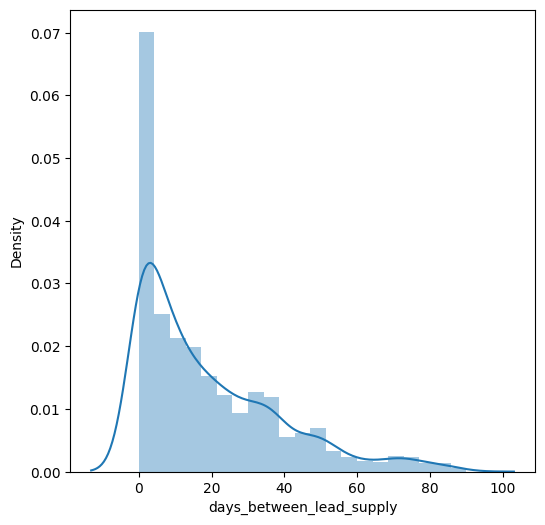

In [48]:
# days_between_lead_supply  distribution
plt.figure(figsize=(6,6))
sns.distplot(data_frame_2['days_between_lead_supply'])
plt.show()

C:\Users\Ayush Singh\AppData\Local\Temp\ipykernel_15416\4044962097.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame_2['Qnantity Supplied'])


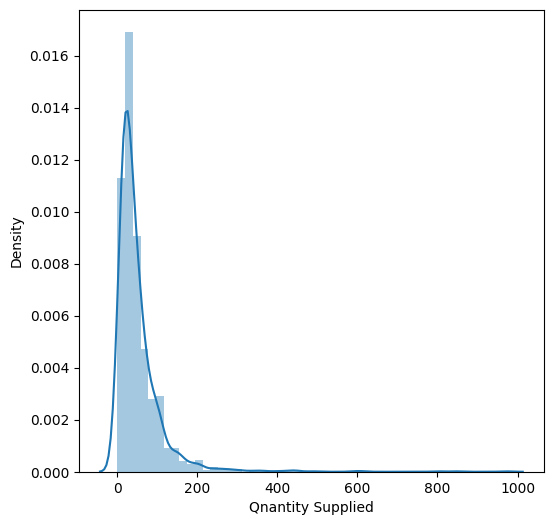

In [49]:
# Qnantity Supplied distribution
plt.figure(figsize=(6,6))
sns.distplot(data_frame_2['Qnantity Supplied'])
plt.show()

C:\Users\Ayush Singh\AppData\Local\Temp\ipykernel_15416\3330908806.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame_2['EMD Changed Count'])


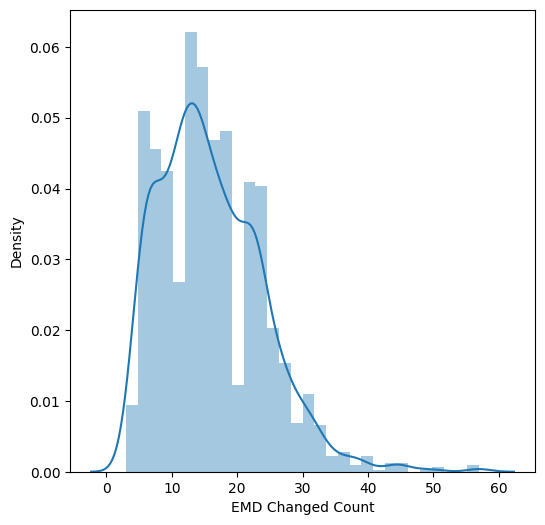

In [50]:

#EMD Changed Count distribution
plt.figure(figsize=(6,6))
sns.distplot(data_frame_2['EMD Changed Count'])
plt.show()

C:\Users\Ayush Singh\AppData\Local\Temp\ipykernel_15416\709232206.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame_2['Supply Validated'])


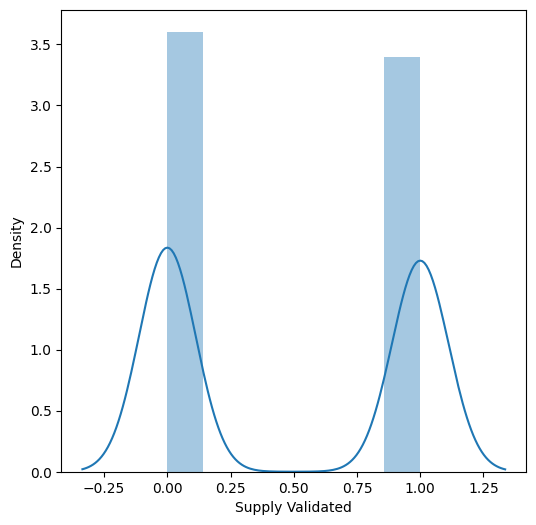

In [51]:
#Supply Validated distribution
plt.figure(figsize=(6,6))
sns.distplot(data_frame_2['Supply Validated'])
plt.show()


C:\Users\Ayush Singh\AppData\Local\Temp\ipykernel_15416\2048957059.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame_2['Supplying Dealer Verified'])


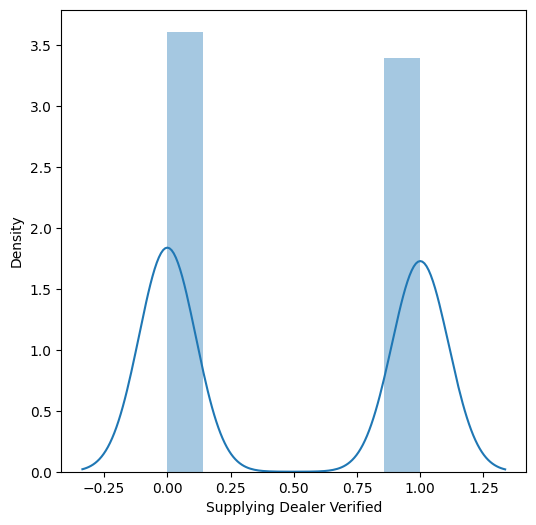

In [52]:
# Supplying Dealer Verified
plt.figure(figsize=(6,6))
sns.distplot(data_frame_2['Supplying Dealer Verified'])
plt.show()


In [53]:
data_frame_2.to_csv('Data/non_null_preprocessed_data.csv', index=False)

Data Null Values are removed now we need to do encoding of classified data

////////////////  Encoding //////////////////

In [54]:
non_null_df = pd.read_csv('Data/non_null_preprocessed_data.csv')

non_null_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1779 entries, 0 to 1778
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Lead Source Type: Picklist Value_x  1779 non-null   object 
 1   Source of Lead: Picklist Value_x    1779 non-null   object 
 2   Site FIR: Picklist Value            1779 non-null   object 
 3   Person meet: Picklist Value         1779 non-null   object 
 4   EMD Changed Count                   1779 non-null   int64  
 5   Geocoordinate (Latitude)            1779 non-null   float64
 6   Geocoordinate (Longitude)           1779 non-null   float64
 7   Site Status: Picklist Value_x       1779 non-null   object 
 8   Lead - Open/Closed: Picklist Value  1779 non-null   object 
 9   Active Status: Picklist Value       1779 non-null   object 
 10  Site Quality: Picklist Value        1779 non-null   object 
 11  Site Requirement: Picklist Value    1779 no

In [55]:
non_null_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1779 entries, 0 to 1778
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Lead Source Type: Picklist Value_x  1779 non-null   object 
 1   Source of Lead: Picklist Value_x    1779 non-null   object 
 2   Site FIR: Picklist Value            1779 non-null   object 
 3   Person meet: Picklist Value         1779 non-null   object 
 4   EMD Changed Count                   1779 non-null   int64  
 5   Geocoordinate (Latitude)            1779 non-null   float64
 6   Geocoordinate (Longitude)           1779 non-null   float64
 7   Site Status: Picklist Value_x       1779 non-null   object 
 8   Lead - Open/Closed: Picklist Value  1779 non-null   object 
 9   Active Status: Picklist Value       1779 non-null   object 
 10  Site Quality: Picklist Value        1779 non-null   object 
 11  Site Requirement: Picklist Value    1779 no

<Figure size 600x600 with 0 Axes>

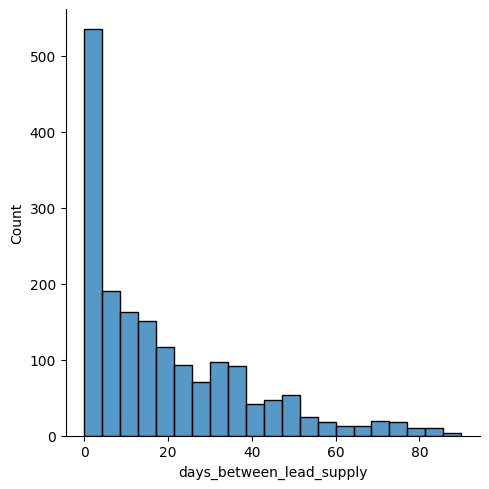

In [56]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.displot(non_null_df['days_between_lead_supply'])
plt.show()

In [57]:
print(non_null_df['Lead Source Type: Picklist Value_x'].unique())

['RLD' 'PLD']


Label Encoding

Lead - Open/Closed: Picklist Value  :   Closed --> 0
                                        Open --> 1

In [58]:
non_null_df.replace({'Lead - Open/Closed: Picklist Value': {'Closed':0 ,'Open':1}}, inplace=True)
print(non_null_df['Lead - Open/Closed: Picklist Value'].unique())

[0 1]


C:\Users\Ayush Singh\AppData\Local\Temp\ipykernel_15416\1856807391.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  non_null_df.replace({'Lead - Open/Closed: Picklist Value': {'Closed':0 ,'Open':1}}, inplace=True)


Active Status: Picklist Value : Active --> 1
                                InActive --> 0

In [59]:
non_null_df.replace({'Active Status: Picklist Value': {'InActive':0 ,'Active':1}}, inplace=True)

C:\Users\Ayush Singh\AppData\Local\Temp\ipykernel_15416\94281114.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  non_null_df.replace({'Active Status: Picklist Value': {'InActive':0 ,'Active':1}}, inplace=True)


One Hot Encoding

In [60]:
categorical_columns = non_null_df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

['Lead Source Type: Picklist Value_x', 'Source of Lead: Picklist Value_x', 'Site FIR: Picklist Value', 'Person meet: Picklist Value', 'Site Status: Picklist Value_x', 'Site Quality: Picklist Value', 'Site Requirement: Picklist Value', 'Call Center Status', 'Division_x', 'Lob_x', 'Designation', 'Hierarchy Level', 'PG3: Category Code', 'SUPPLIED BY', 'SKU: Picklist Value']


In [61]:

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(non_null_df[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([non_null_df, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)



In [62]:
df_encoded.to_csv('Data/ultimate_data.csv', index=False)

///////////////            Working Out On Model  //////////////////////////

In [63]:
finalized_df = pd.read_csv('Data/ultimate_data.csv')
finalized_df.describe()

,EMD Changed Count,Geocoordinate (Latitude),Geocoordinate (Longitude),Lead - Open/Closed: Picklist Value,Active Status: Picklist Value,Is EMD Changed,Is Invalid Lead,Is Verified By CC,Live Lead,EMP Status,...,PG3: Category Code_Traded Ply,PG3: Category Code_Win MR,PG3: Category Code_Zykron,SUPPLIED BY_Dealer,SUPPLIED BY_Retailer,SKU: Picklist Value_EA,SKU: Picklist Value_L,SKU: Picklist Value_M2,SKU: Picklist Value_PC,SKU: Picklist Value_ROL
count,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,...,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000
mean,15.998314,22.852135,81.376669,0.114109,0.999438,0.336706,0.060708,0.516582,0.115233,0.039348,...,0.000562,0.002248,0.001686,0.963463,0.036537,0.000562,0.001124,0.016301,0.980888,0.001124
std,7.959013,4.224970,6.728914,0.318033,0.023709,0.472716,0.238862,0.499865,0.319393,0.194476,...,0.023709,0.047378,0.041042,0.187676,0.187676,0.023709,0.033520,0.126667,0.136957,0.033520
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,20.848266,77.676952,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,15.000000,23.529724,82.191128,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,21.000000,25.606407,85.520013,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,57.000000,32.140840,94.650915,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Separating the data and labels

In [64]:
# separating the data and labels
X = finalized_df.drop(columns = 'days_between_lead_supply', axis=1)
Y = finalized_df['days_between_lead_supply']

In [65]:
print(X)

      EMD Changed Count  Geocoordinate (Latitude)  Geocoordinate (Longitude)  \
0                     7                 22.280564                  73.224759   
1                    11                 24.575497                  80.777790   
2                     9                 23.824588                  91.281041   
3                    11                 17.258693                  80.155531   
4                    13                 29.999328                  75.394258   
...                 ...                       ...                        ...   
1774                  6                 23.118010                  72.571556   
1775                  5                 23.119497                  72.571613   
1776                  5                 23.119530                  72.571615   
1777                  5                 23.081423                  72.498454   
1778                  5                 23.081423                  72.498454   

      Lead - Open/Closed: Picklist Valu

In [66]:
print(Y)

0       38
1        0
2       18
3        2
4        6
        ..
1774     0
1775     0
1776     0
1777     0
1778     0
Name: days_between_lead_supply, Length: 1779, dtype: int64


DATA STANDARDIZATION

In [67]:
scaler = StandardScaler()

In [68]:
scaler.fit(X)

StandardScaler()

In [69]:
standardized_data = scaler.transform(X)

In [70]:
print(standardized_data)

[[-1.13089946 -0.13532204 -1.21181556 ... -0.12873006  0.13958596
  -0.03354836]
 [-0.62818328  0.408014   -0.08902595 ... -0.12873006  0.13958596
  -0.03354836]
 [-0.87954137  0.23023276  1.47232621 ...  7.76819333 -7.16404421
  -0.03354836]
 ...
 [-1.38225755  0.0633069  -1.3089081  ... -0.12873006  0.13958596
  -0.03354836]
 [-1.38225755  0.05428494 -1.31978383 ... -0.12873006  0.13958596
  -0.03354836]
 [-1.38225755  0.05428494 -1.31978383 ... -0.12873006  0.13958596
  -0.03354836]]


In [71]:
X = standardized_data
Y = finalized_df['days_between_lead_supply']

In [72]:
print(X)
print(Y)

[[-1.13089946 -0.13532204 -1.21181556 ... -0.12873006  0.13958596
  -0.03354836]
 [-0.62818328  0.408014   -0.08902595 ... -0.12873006  0.13958596
  -0.03354836]
 [-0.87954137  0.23023276  1.47232621 ...  7.76819333 -7.16404421
  -0.03354836]
 ...
 [-1.38225755  0.0633069  -1.3089081  ... -0.12873006  0.13958596
  -0.03354836]
 [-1.38225755  0.05428494 -1.31978383 ... -0.12873006  0.13958596
  -0.03354836]
 [-1.38225755  0.05428494 -1.31978383 ... -0.12873006  0.13958596
  -0.03354836]]
0       38
1        0
2       18
3        2
4        6
        ..
1774     0
1775     0
1776     0
1777     0
1778     0
Name: days_between_lead_supply, Length: 1779, dtype: int64


SPLITTING THE DATA INTO TRAINING DATA & TESTING DATA

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [74]:
print(X.shape, X_train.shape, X_test.shape)

(1779, 102) (1423, 102) (356, 102)


MACHINE LEARNING MODEL

XGRegressor Boost

In [75]:
params = {
    'learning_rate': 0.1,
    'max_depth': 3,
    'n_estimators': 100,
    'gamma': 0,
    'colsample_bytree': 0.8,
    'objective': 'reg:squarederror',  # For regression tasks
    'eval_metric': 'rmse',  # Evaluation metric
    'random_state': 42  # Random seed for reproducibility
}
regressor = XGBRegressor(**params)

In [76]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

EVALUATION

In [77]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [78]:
for val in training_data_prediction:
    print(val)


21.004993
5.426001
5.870983
7.9369025
1.5710944
37.12438
15.235325
8.114266
19.275185
21.823227
41.477036
20.854513
16.74895
31.257698
2.4700406
9.564927
18.561142
29.228674
31.999697
25.905043
29.705862
20.029665
22.525417
21.574308
36.420876
29.440317
6.9404864
9.998476
24.277351
1.0088061
25.327316
25.141815
2.2222955
40.75312
41.51371
20.09094
26.49414
48.750034
30.52531
41.07334
4.6707726
30.898851
20.437286
13.157366
5.0541577
1.0039724
11.673035
30.651005
36.518883
49.468945
26.869911
4.713684
3.429368
-0.8083898
11.893394
6.311951
1.922932
12.168101
39.084194
0.9717738
11.11359
13.577005
25.344639
7.4464784
33.402897
21.299862
26.172613
34.462357
2.6140082
18.952873
1.7846957
21.010948
0.30234215
2.4700406
20.519913
8.502058
16.336578
15.056541
8.997284
33.410595
57.4297
49.62102
18.535103
15.3937025
21.796444
1.9537255
29.644548
15.908
30.621954
20.605963
9.16828
7.553956
10.302573
0.81925946
4.307136
22.248718
7.0582294
7.6071873
24.549902
36.13997
10.017485
37.337013
21.0634

In [79]:
for val1, val2 in zip(training_data_prediction, Y_train):
    print(f"{val1} <-- {val2}")


21.004993438720703 <-- 10
5.426001071929932 <-- 4
5.870983123779297 <-- 3
7.9369025230407715 <-- 21
1.5710943937301636 <-- 0
37.1243782043457 <-- 35
15.23532485961914 <-- 12
8.114266395568848 <-- 0
19.275184631347656 <-- 9
21.823226928710938 <-- 37
41.47703552246094 <-- 44
20.85451316833496 <-- 50
16.74894905090332 <-- 36
31.25769805908203 <-- 19
2.4700405597686768 <-- 0
9.564927101135254 <-- 10
18.561141967773438 <-- 25
29.228673934936523 <-- 10
31.999696731567383 <-- 31
25.90504264831543 <-- 18
29.705862045288086 <-- 11
20.029664993286133 <-- 49
22.52541732788086 <-- 14
21.574308395385742 <-- 39
36.420875549316406 <-- 42
29.440317153930664 <-- 37
6.940486431121826 <-- 0
9.998476028442383 <-- 0
24.27735137939453 <-- 25
1.0088061094284058 <-- 7
25.327316284179688 <-- 30
25.141815185546875 <-- 24
2.2222955226898193 <-- 0
40.75312042236328 <-- 46
41.513710021972656 <-- 42
20.090940475463867 <-- 18
26.494140625 <-- 51
48.75003433227539 <-- 84
30.525310516357422 <-- 0
41.073341369628906 <-

In [80]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [88]:
print('R Squared train value = ' ,r2_train)

R Squared train value =  0.590259675114041


In [82]:
print(X_test)

[[-0.12546711  0.64485716  0.56098396 ... -0.12873006  0.13958596
  -0.03354836]
 [ 0.37724907  0.1329817   0.59011115 ... -0.12873006  0.13958596
  -0.03354836]
 [-1.13089946 -3.40116419 -0.65872062 ... -0.12873006  0.13958596
  -0.03354836]
 ...
 [ 1.50836047  0.56058109  0.82944948 ... -0.12873006  0.13958596
  -0.03354836]
 [ 0.50292812 -0.00369331 -1.05734829 ... -0.12873006  0.13958596
  -0.03354836]
 [-0.75386233  0.97400629 -0.8322082  ... -0.12873006  0.13958596
  -0.03354836]]


In [83]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [84]:
for val1, val2 in zip(test_data_prediction, Y_test):
    print(f"{val1} <-- {val2}")

# print(len(test_data_prediction))

11.382081031799316 <-- 5
25.020458221435547 <-- 29
4.9449005126953125 <-- 8
11.048517227172852 <-- 0
26.85174560546875 <-- 36
23.482913970947266 <-- 23
9.815779685974121 <-- 0
37.771263122558594 <-- 48
-0.5839404463768005 <-- 2
22.08619499206543 <-- 8
8.762188911437988 <-- 8
12.74123764038086 <-- 9
17.62518310546875 <-- 7
25.62493133544922 <-- 30
19.164880752563477 <-- 54
4.833745956420898 <-- 0
33.733558654785156 <-- 26
1.6912227869033813 <-- 0
22.467554092407227 <-- 47
15.26093578338623 <-- 37
7.909820556640625 <-- 7
33.762351989746094 <-- 49
57.71531677246094 <-- 71
28.336475372314453 <-- 15
2.00408935546875 <-- 1
8.28055191040039 <-- 0
25.90504264831543 <-- 32
10.373872756958008 <-- 1
28.483869552612305 <-- 16
27.28499984741211 <-- 3
9.531579971313477 <-- 0
10.676060676574707 <-- 0
19.29104232788086 <-- 19
28.29349136352539 <-- 34
8.25436019897461 <-- 6
17.213577270507812 <-- 18
60.24299240112305 <-- 74
13.891265869140625 <-- 6
19.028474807739258 <-- 23
14.415144920349121 <-- 45
31

In [ ]:

    
# len(Y_test)

In [85]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [87]:
print('R Squared test value = ', r2_test)

R Squared test value =  0.5256031043805494
